<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Curso 2022 - 2023</p>
<p style="margin: 0; text-align:right;">Máster universitario en Ciencia de datos</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Predicción de supervivencia de pacientes con cáncer de mama tratados con quimioterapia neoadyuvante

 - **Autor**: Irene López Ruiz
 - **Área**: Ciencia de datos aplicada al cáncer de mama.
 - **Tutor**: Antonio Ruiz Falcó Rojas
 - **Profesor responsable de la asignatura**: Àngels Rius Gavidia
 
 El objetivo principal de este trabajo es crear tres modelos predictivos con técnicas de machine learning capaces de predecir la respuesta patológica completa (pCR), la supervivencia (SS) y la supervivencia libre de recurrencia (RFS), respectivamente, en pacientes con cáncer de mama tratados con quimioterapia neoadyuvante (NAC).
En la consecución del objetivo principal se conseguirán a su vez varios objetivos secundarios:
1.	Identificar los factores más influyentes en cada una de las variables a predecir (pCR, SS y RFS) en pacientes con cáncer de mama tratados con NAC. 
2.	Plantear el uso de los modelos construidos para la predicción del pronóstico de un paciente con cáncer de mama tratado con quimioterapia neoadyuvante.
3.	Definir un flujo de trabajo que permita facilitar el entrenamiento de modelos de predicción con datos de características similares a través de técnicas de preprocesado.
4.	Demostrar el potencial de la aplicación de machine learning en aplicaciones biomédicas.


<a id="index"></a>

# Table of contents

* 1. [Data load](#data_load)
* 2. [Stadistical analysis](#stat)
  * 2.1. [Univariant analysis](#univariant)
  * 2.2. [Multivariant analysis](#multivariant)
* 3. [Preprocessing](#preproc)
* 4. [Machine leraning models](#ml)
  * 4.1. [Prediction of PCR](#pcr_ml)
    * 4.1.1. [Support vector machine](#pcr_svm)
    * 4.1.2. [Decision tree](#pcr_decsiontree)
    * 4.1.3. [Random forest](#pcr_randomforest)
    * 4.1.4. [Gradient boosting Machines](#pcr_gbm)
    * 4.1.5. [Best model variables importance](#pcr_var_importance)
  * 4.2. [Prediction of Status](#status_ml)
    * 4.2.1. [Support vector machine](#status_svm)
    * 4.2.2. [Decision tree](#status_decsiontree)
    * 4.2.3. [Random forest](#status_randomforest)
    * 4.2.4. [Gradient boosting Machines](#status_gbm)
    * 4.2.5. [Best model variables importance](#ss_var_importance)
  * 4.3. [Prediction of RFS](#rfs_ml)
    * 4.3.1. [Support vector machine](#rfs_svm)
    * 4.3.2. [Decision tree](#rfs_decsiontree)
    * 4.3.3. [Random forest](#rfs_randomforest)
    * 4.3.4. [Gradient boosting Machines](#rfs_gbm)
    * 4.3.5. [Best model variables importance](#rfs_var_importance)


In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import pickle


from load_data import load_data
from statistical_analysis import categorical_vars, numerical_vars, corr_categorical, numeric_var_by_category, rfs_by_category
from machine_learning_models import split_data, binary_classifier_metrics, plot_roc, plot_feature_importance
from machine_learning_models import train_test_classifier, regressor_metrics, train_test_regressor

<a id="data_load"></a>

## 1. Data load

[Back to contents](#index)

ISPY-1 data is provided as an XLSX file with multiple sheets. First step is to load this dataset and arrange all its features in a dataframe. The file is stored in the `data` folder.

In [2]:
# Load ISPY1 data
file = '../data/I-SPY 1 All Patient Clinical and Outcome Data.xlsx'
ISPY = load_data(file)

ISPY.head()

C:\Users\irene\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\irene\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,age,race_id,ER+,PR+,HR+,HER2+,HR_HER2,HR_HER2_STATUS,Bilateral,Laterality,MRI_LD_T1,MRI_LD_T2,MRI_LD_T3,MRI_LD_T4,Survival,Survival_length,RFS,RFS_code,PCR,RCB
SUBJECTID,,,,,,,,,,,,,,,,,,,,
1001,38.73,1,1.0,0.0,1.0,0.0,1.0,HRposHER2neg,0,1,88.0,78.0,30.0,14.0,8,1264,751,1,0.0,2.0
1002,37.79,1,1.0,1.0,1.0,0.0,1.0,HRposHER2neg,0,2,29.0,26.0,66.0,16.0,8,1155,1043,1,0.0,3.0
1003,49.83,1,1.0,1.0,1.0,0.0,1.0,HRposHER2neg,0,1,50.0,64.0,54.0,46.0,7,2387,2387,0,0.0,3.0
1004,48.28,1,0.0,0.0,0.0,0.0,3.0,TripleNeg,0,1,91.0,90.0,99.0,43.0,7,2436,2436,0,0.0,NaN
1005,45.80,1,1.0,1.0,1.0,0.0,1.0,HRposHER2neg,0,1,98.0,109.0,60.0,42.0,7,2220,2520,0,0.0,NaN


<a id="stat"></a>

## 2. Stadistical analysis

[Back to contents](#index)

After data loading, a descriptive analysis of the data is performed to assess the completeness of the data, the distributions of the variables and the relationships between variables. The dataset consists of a total of **221 records and 20 attributes**. 

The analysis is divided in two parts: 
- **Univariant analysis**. Assets the distribution and general description of each variable.
- **Multivariant analysis**. Assets the correlation between variables.

<a id="univariant"></a>

### 2.1 Univariant analysis


[Back to contents](#index)

Categorical variables distributions are inspected by bar plots.

,race_id,ER+,PR+,HR+,HER2+,HR_HER2,HR_HER2_STATUS,Bilateral,Laterality,Survival,RFS_code,PCR,RCB
count,221,219,219,219,216,216,216,221,221,221,221,215,201
unique,6,2,2,2,2,3,3,2,2,3,2,2,4
top,Caucasian,Yes,No,Yes,No,HR+ Her2-,HRposHER2neg,No,Right,Yes,No,No,II
freq,165,125,115,131,149,96,96,217,114,176,158,157,86


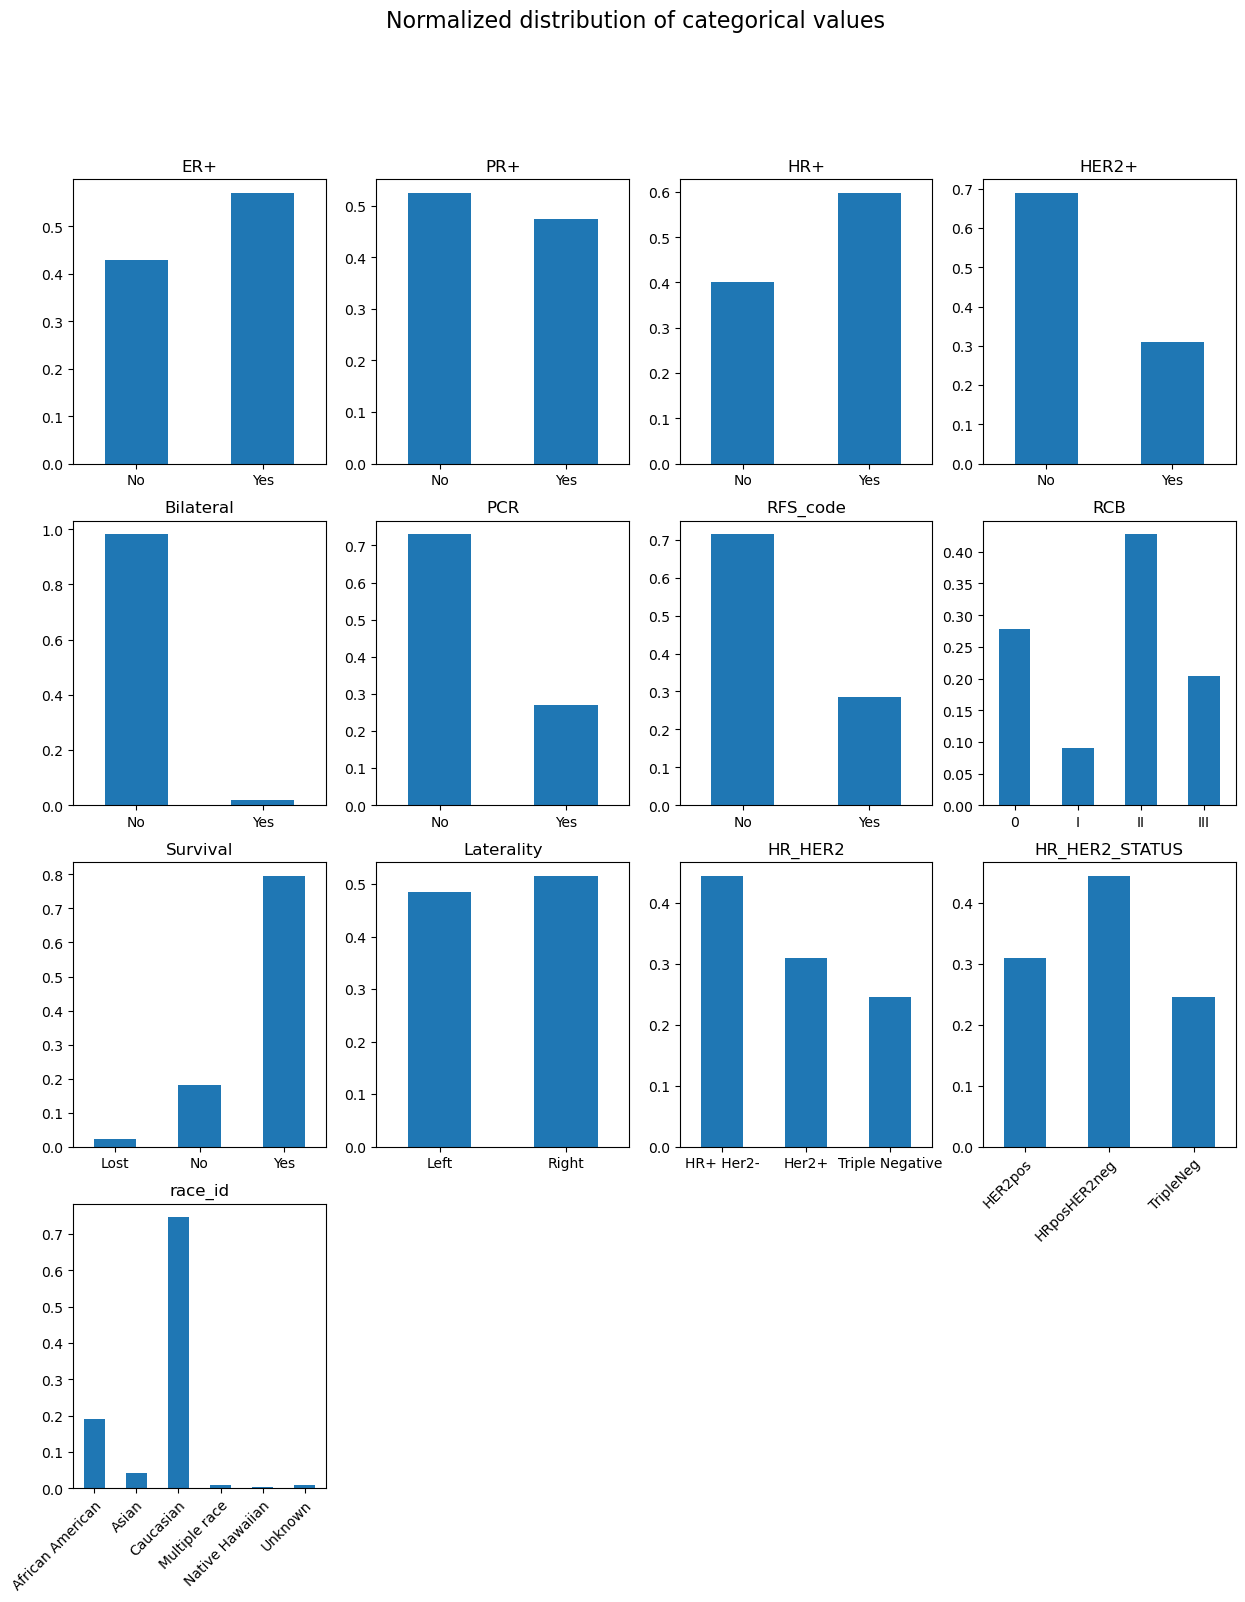

In [3]:
# Make a copy of dataframe to perform statistical analysis
df_stat = ISPY.copy()

# Perform analysis of CATEGORICAL VARIABLES
df_stat = categorical_vars(df_stat)

# Summary for categorical data
df_stat.describe(include='object')

Numerical variables distributions are inspected by density plots.

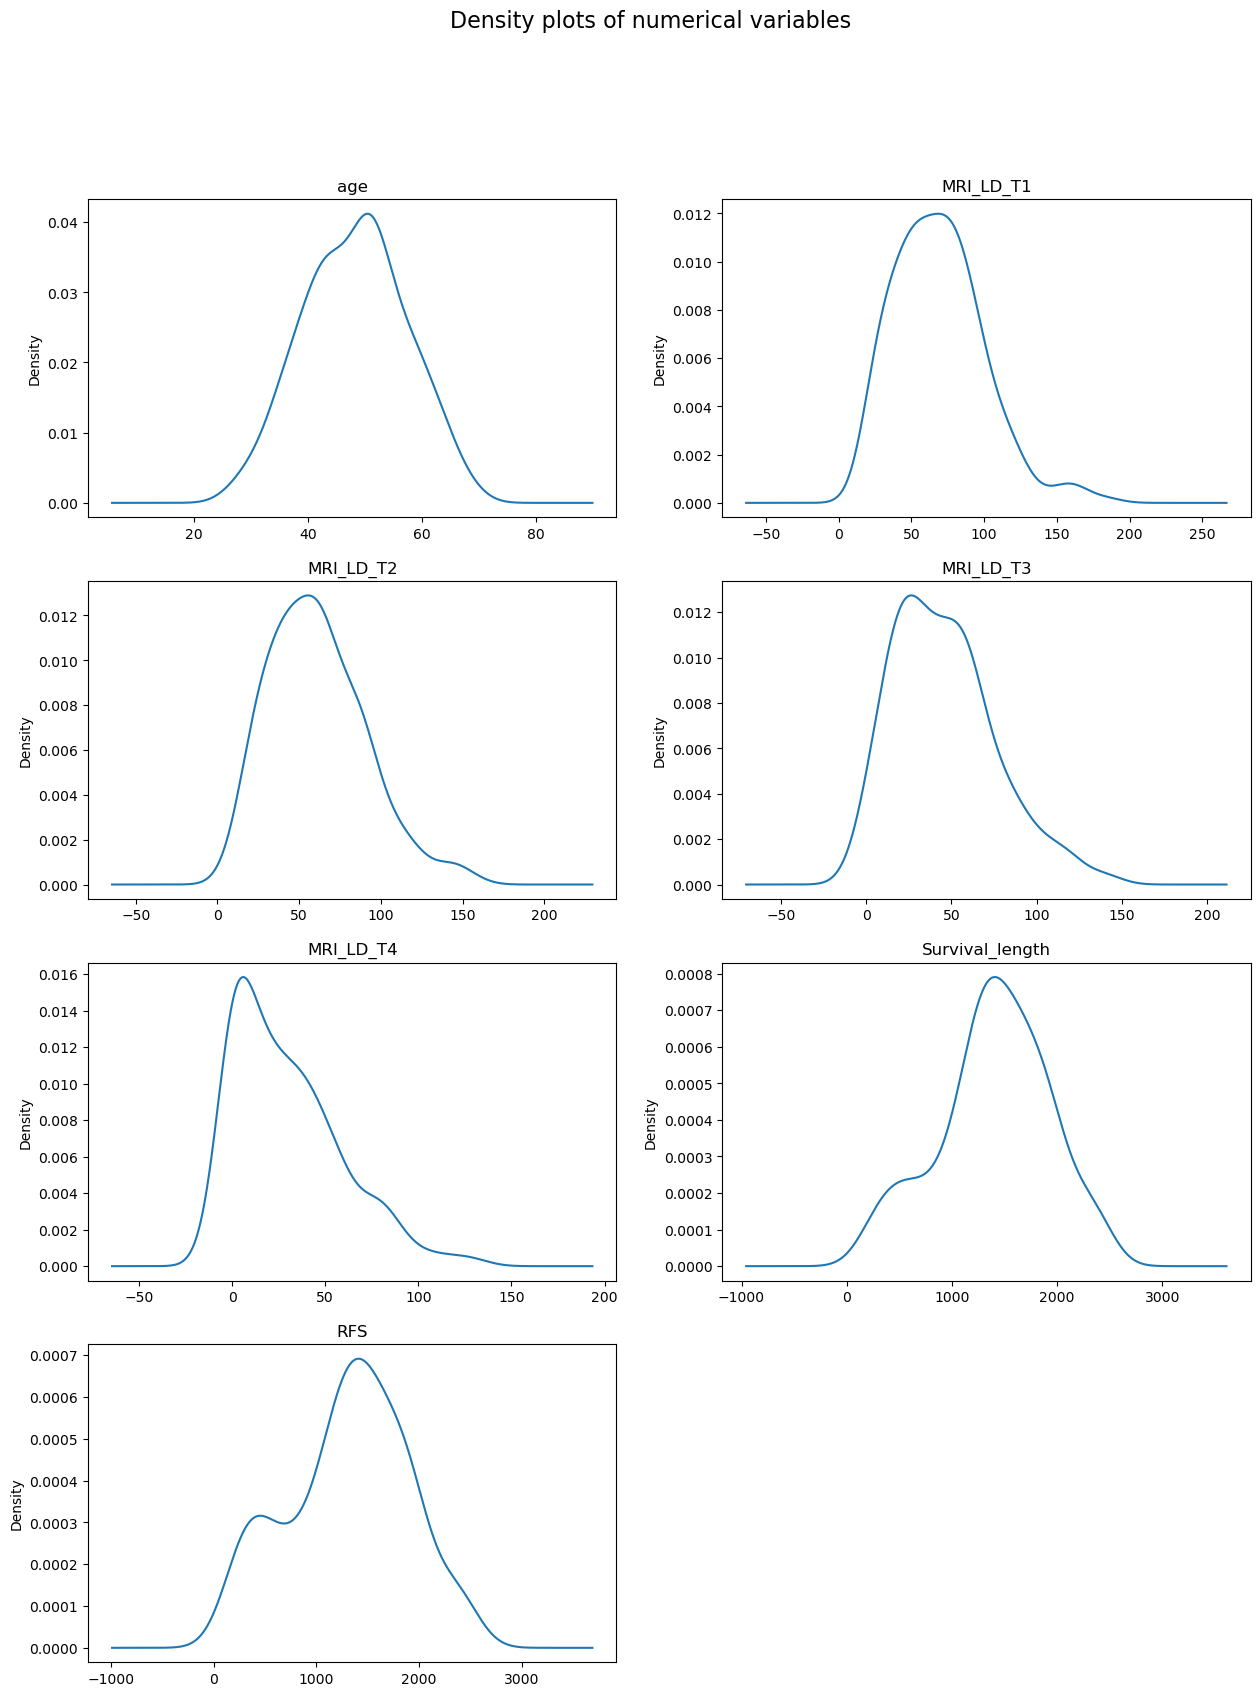

In [4]:
# Perform analysis of NUMERICAL VARIABLES
numerical_vars(df_stat)

<a id="multivariant"></a>

### 2.2 Multivariant analysis

[Back to contents](#index)

Correlation between categorical variables is analyzed by the $\chi^2$ test of independece. The variables whose independence is proven by the $\chi^2$ test are then plotted by a bar plot of the output variable by the predictor.

<Figure size 640x480 with 0 Axes>

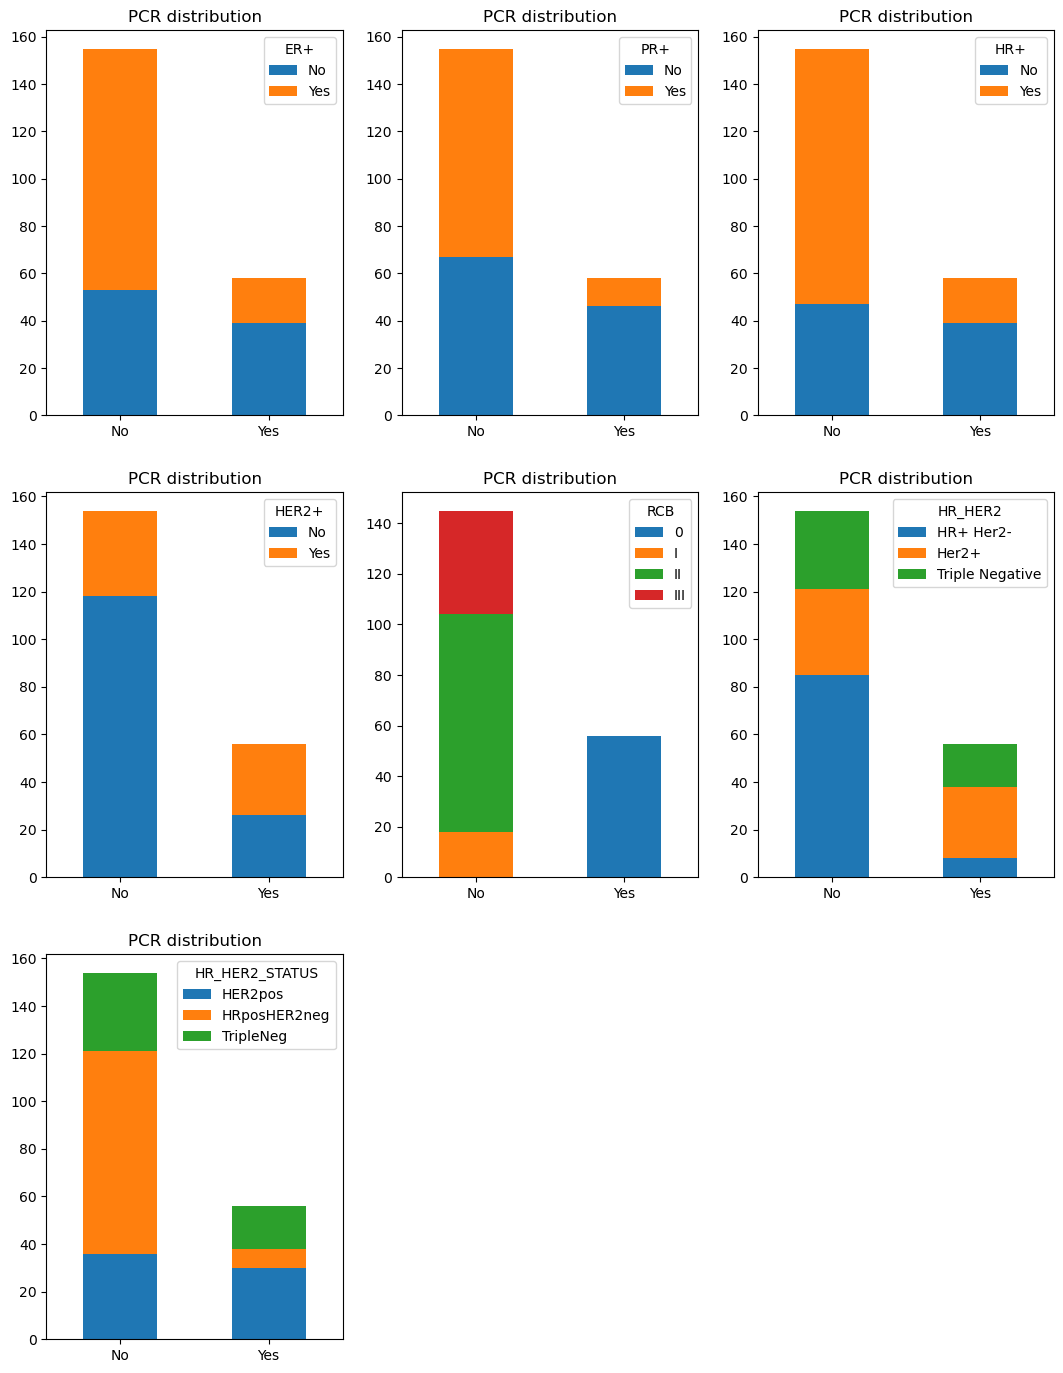

,chi_square,p-value,conclusion
ER+,18.786766,8.654911e-04,Null Hypothesis is rejected.
PR+,22.064961,1.945404e-04,Null Hypothesis is rejected.
HR+,23.896387,8.378662e-05,Null Hypothesis is rejected.
HER2+,17.373450,1.635235e-03,Null Hypothesis is rejected.
Bilateral,0.008085,9.999919e-01,Failed to reject the null hypothesis.
RFS_code,7.431104,1.147860e-01,Failed to reject the null hypothesis.
RCB,201.000000,3.933496e-39,Null Hypothesis is rejected.
Survival,6.353285,3.847998e-01,Failed to reject the null hypothesis.
Laterality,0.166042,9.967387e-01,Failed to reject the null hypothesis.
HR_HER2,29.373461,5.169281e-05,Null Hypothesis is rejected.


In [5]:
# Correlacion con PCR  
categorical_feats = ['ER+','PR+','HR+', 'HER2+', 'Bilateral','PCR', 'RFS_code', 'RCB', 
                     'Survival', 'Laterality', 'HR_HER2', 'HR_HER2_STATUS', 'race_id']
categorical_predictors = [n for n in categorical_feats if n != 'PCR']
corr_categorical(categorical_predictors, 'PCR', df_stat, alpha=0.05)

<Figure size 640x480 with 0 Axes>

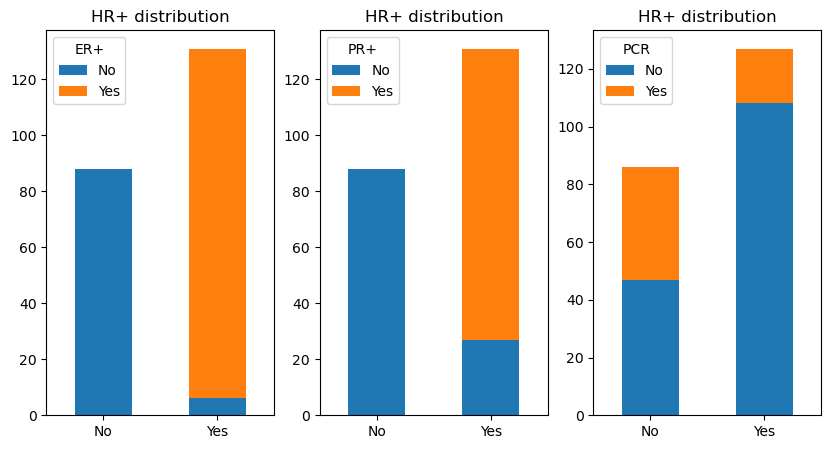

,chi_square,p-value,conclusion
ER+,195.630989,3.266597e-41,Null Hypothesis is rejected.
PR+,133.042682,8.701413e-28,Null Hypothesis is rejected.
HER2+,3.611206,4.611718e-01,Failed to reject the null hypothesis.
Bilateral,2.737014,6.027533e-01,Failed to reject the null hypothesis.
PCR,23.896387,8.378662e-05,Null Hypothesis is rejected.
RFS_code,1.563309,8.153710e-01,Failed to reject the null hypothesis.
RCB,21.344859,6.285623e-03,Null Hypothesis is rejected.
Survival,11.708236,6.880334e-02,Failed to reject the null hypothesis.
Laterality,0.026804,9.999110e-01,Failed to reject the null hypothesis.
HR_HER2,146.115035,5.125200e-29,Null Hypothesis is rejected.


In [6]:
# Correlacion con HR
categorical_predictors = [n for n in categorical_feats if n != 'HR+']
corr_categorical(categorical_predictors, 'HR+', df_stat, alpha=0.05)

<Figure size 640x480 with 0 Axes>

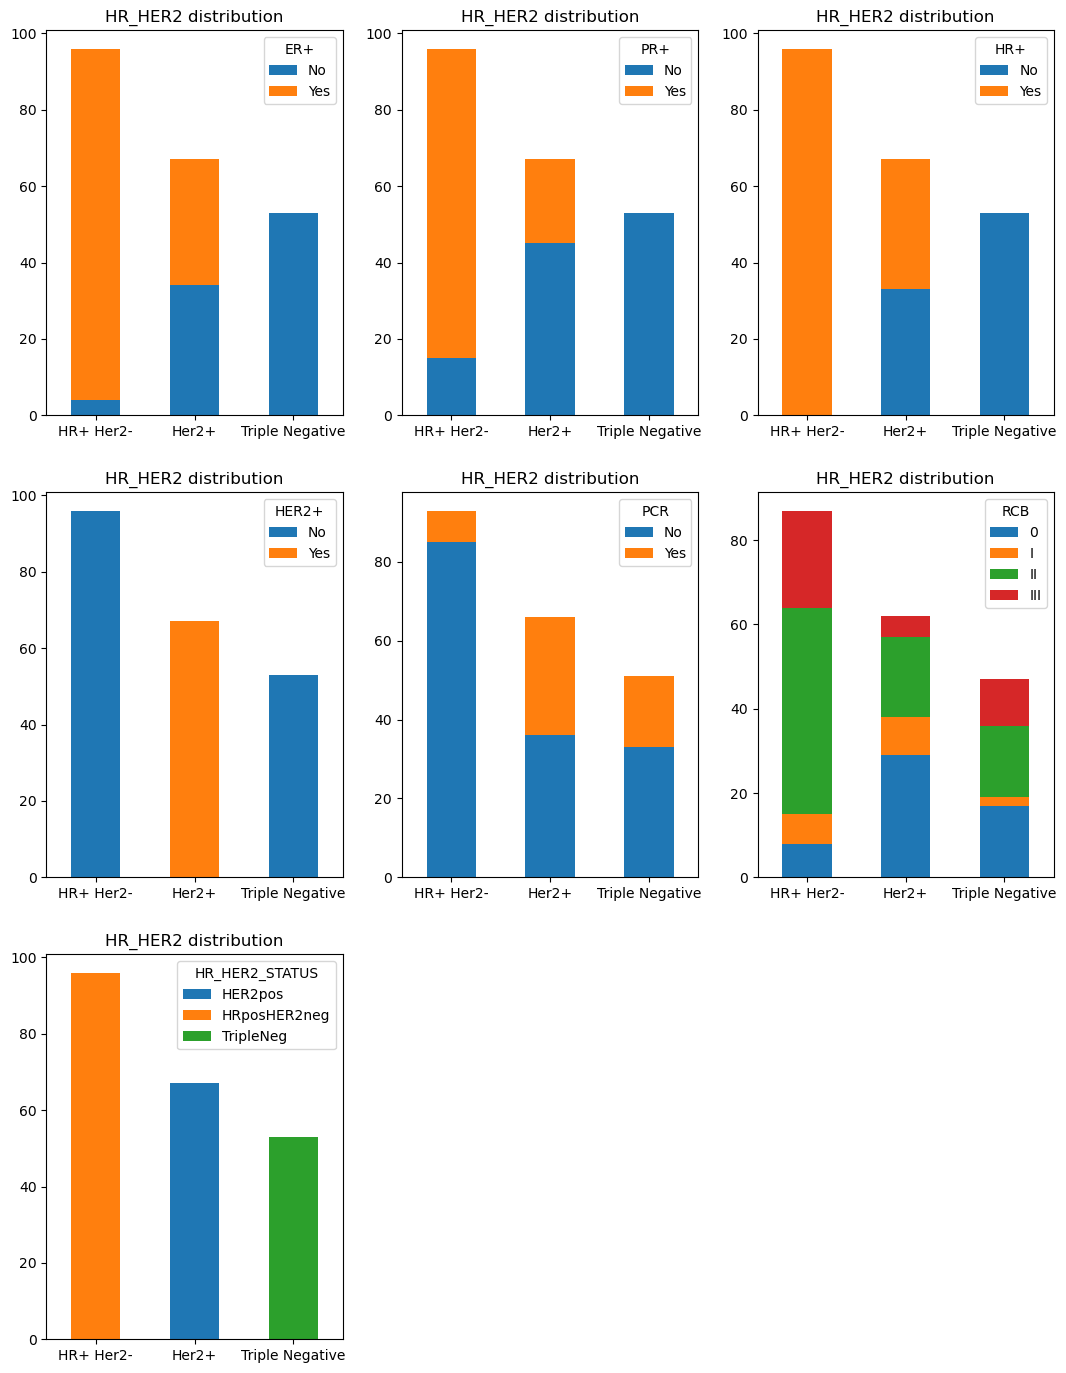

,chi_square,p-value,conclusion
ER+,131.590162,5.944506e-26,Null Hypothesis is rejected.
PR+,106.034829,1.377260e-20,Null Hypothesis is rejected.
HR+,146.115035,5.125200e-29,Null Hypothesis is rejected.
HER2+,216.000000,7.414050e-44,Null Hypothesis is rejected.
Bilateral,1.501690,9.593822e-01,Failed to reject the null hypothesis.
PCR,29.373461,5.169281e-05,Null Hypothesis is rejected.
RFS_code,5.275381,5.090093e-01,Failed to reject the null hypothesis.
RCB,36.272936,2.928286e-04,Null Hypothesis is rejected.
Survival,14.796329,9.668455e-02,Failed to reject the null hypothesis.
Laterality,0.095912,9.999823e-01,Failed to reject the null hypothesis.


In [7]:
# Correlacion con HR_HER2
categorical_predictors = [n for n in categorical_feats if n != 'HR_HER2']
corr_categorical(categorical_predictors, 'HR_HER2', df_stat, alpha=0.05)

<Figure size 640x480 with 0 Axes>

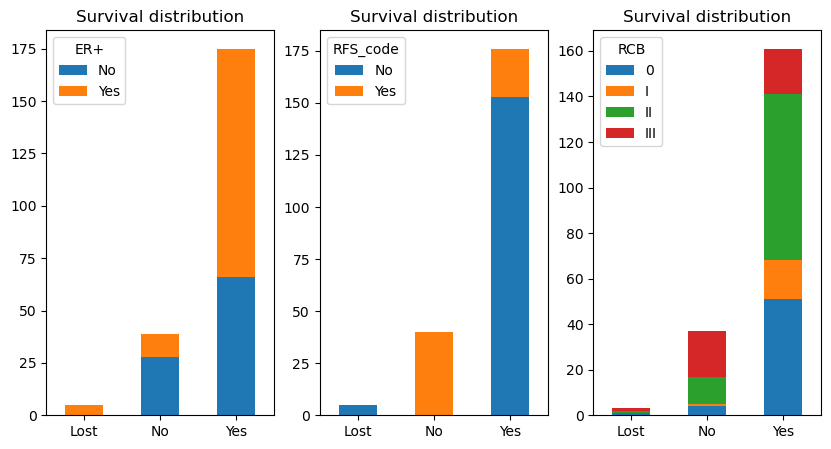

,chi_square,p-value,conclusion
ER+,18.967905,4.218181e-03,Null Hypothesis is rejected.
PR+,10.248289,1.145780e-01,Failed to reject the null hypothesis.
HR+,11.708236,6.880334e-02,Failed to reject the null hypothesis.
HER2+,2.302260,8.899084e-01,Failed to reject the null hypothesis.
Bilateral,1.041579,9.839869e-01,Failed to reject the null hypothesis.
PCR,6.353285,3.847998e-01,Failed to reject the null hypothesis.
RFS_code,122.894465,4.017110e-24,Null Hypothesis is rejected.
RCB,34.129653,6.435026e-04,Null Hypothesis is rejected.
Laterality,2.503519,8.680736e-01,Failed to reject the null hypothesis.
HR_HER2,14.796329,9.668455e-02,Failed to reject the null hypothesis.


In [8]:
# Correlacion con Survival
categorical_predictors = [n for n in categorical_feats if n != 'Survival']
corr_categorical(categorical_predictors, 'Survival', df_stat, alpha=0.05)

The correlation of numerical variables is explored in a general approach by a correlation matrix.

In [9]:
# Correlation matrix bettween numerical variables
corr_matrix = df_stat.corr()
corr_matrix.style.background_gradient(axis=None, cmap='coolwarm')

,age,MRI_LD_T1,MRI_LD_T2,MRI_LD_T3,MRI_LD_T4,Survival_length,RFS
age,1.000000,-0.035066,-0.061463,-0.086164,0.027006,0.038192,0.066215
MRI_LD_T1,-0.035066,1.000000,0.873969,0.650825,0.429317,-0.005607,-0.061878
MRI_LD_T2,-0.061463,0.873969,1.000000,0.671798,0.421361,-0.017568,-0.063911
MRI_LD_T3,-0.086164,0.650825,0.671798,1.000000,0.667145,-0.104440,-0.159423
MRI_LD_T4,0.027006,0.429317,0.421361,0.667145,1.000000,-0.083064,-0.125068
Survival_length,0.038192,-0.005607,-0.017568,-0.104440,-0.083064,1.000000,0.868712
RFS,0.066215,-0.061878,-0.063911,-0.159423,-0.125068,0.868712,1.000000


To analyse the relation between the numeric features and the categorical variables to predict, `PCR` and `Survival`, density plots of each numeric variable for each of the categories is displayed.

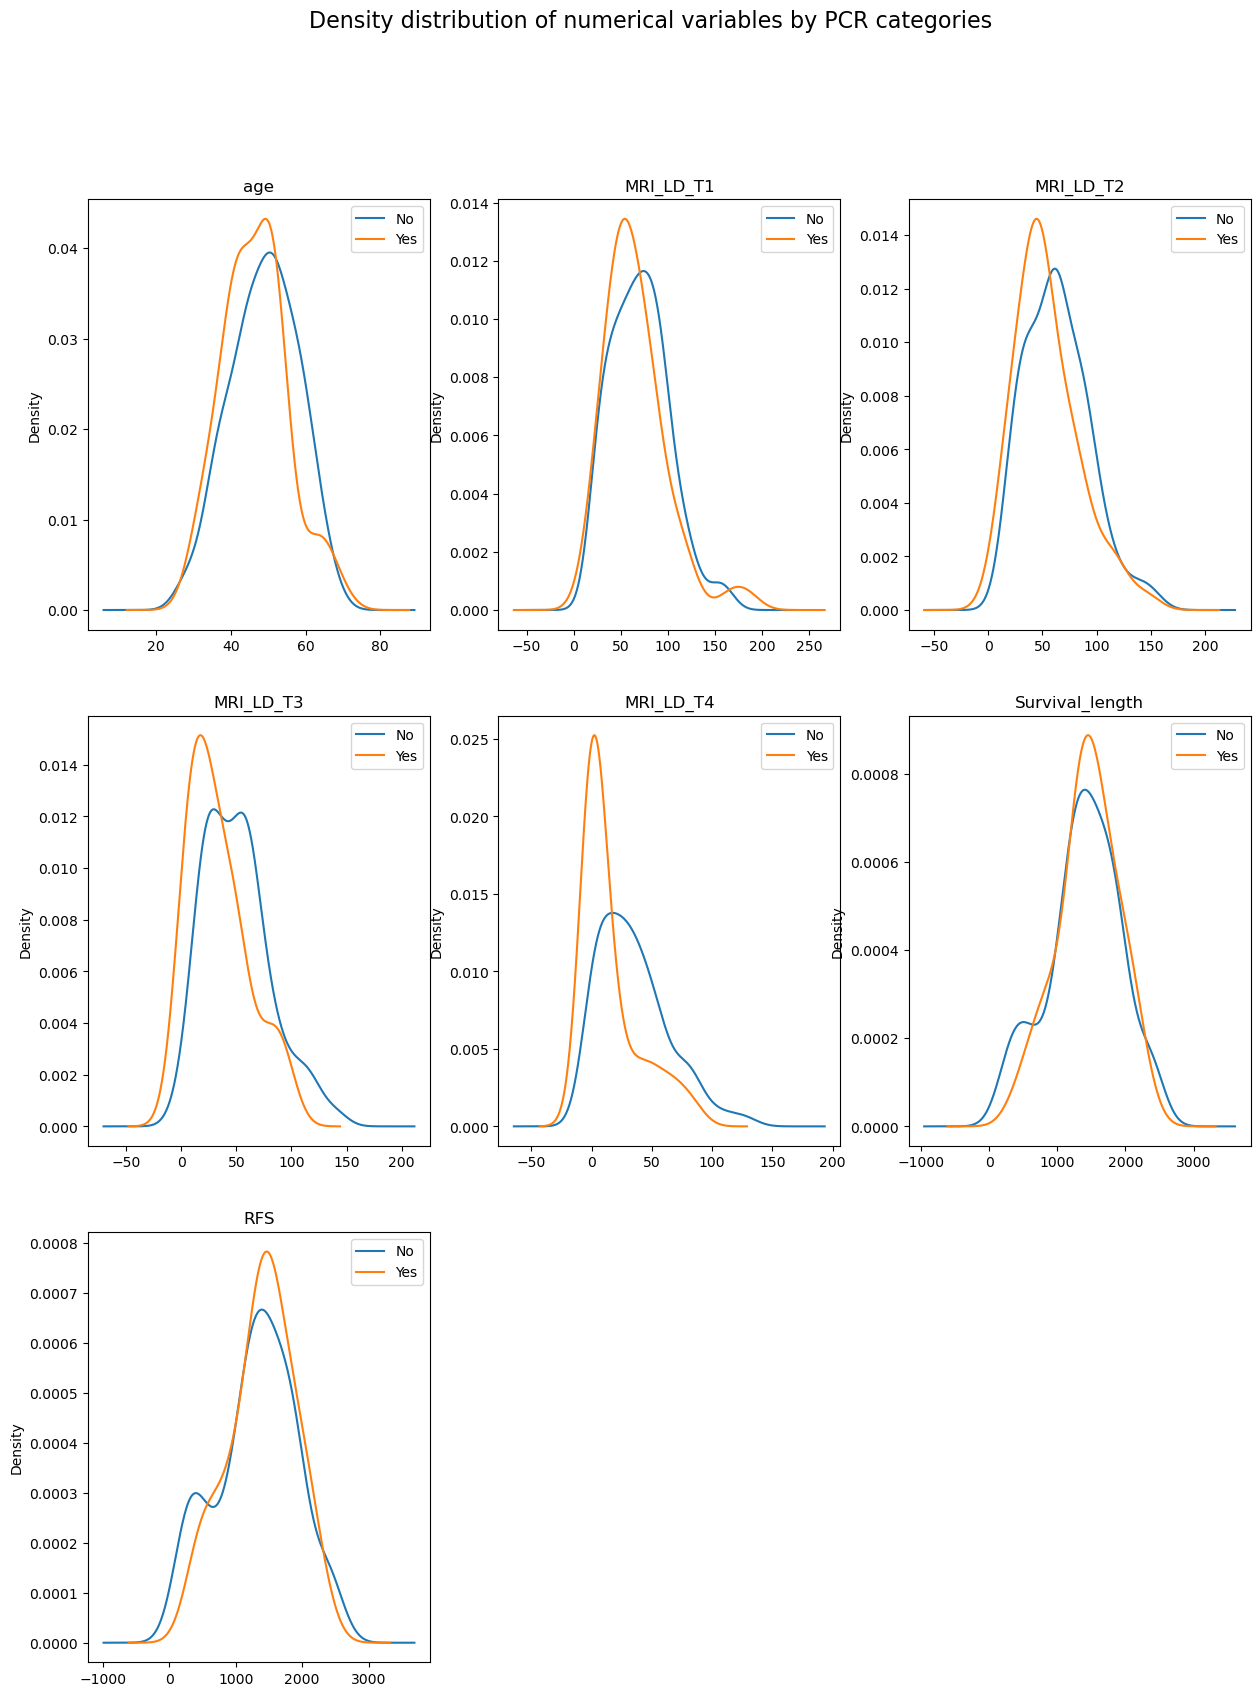

In [10]:
numeric_feats = [ 'age', 'MRI_LD_T1', 'MRI_LD_T2', 'MRI_LD_T3', 
                        'MRI_LD_T4', 'Survival_length', 'RFS']
# By PCR
numeric_var_by_category(df_stat, numeric_feats, 'PCR')

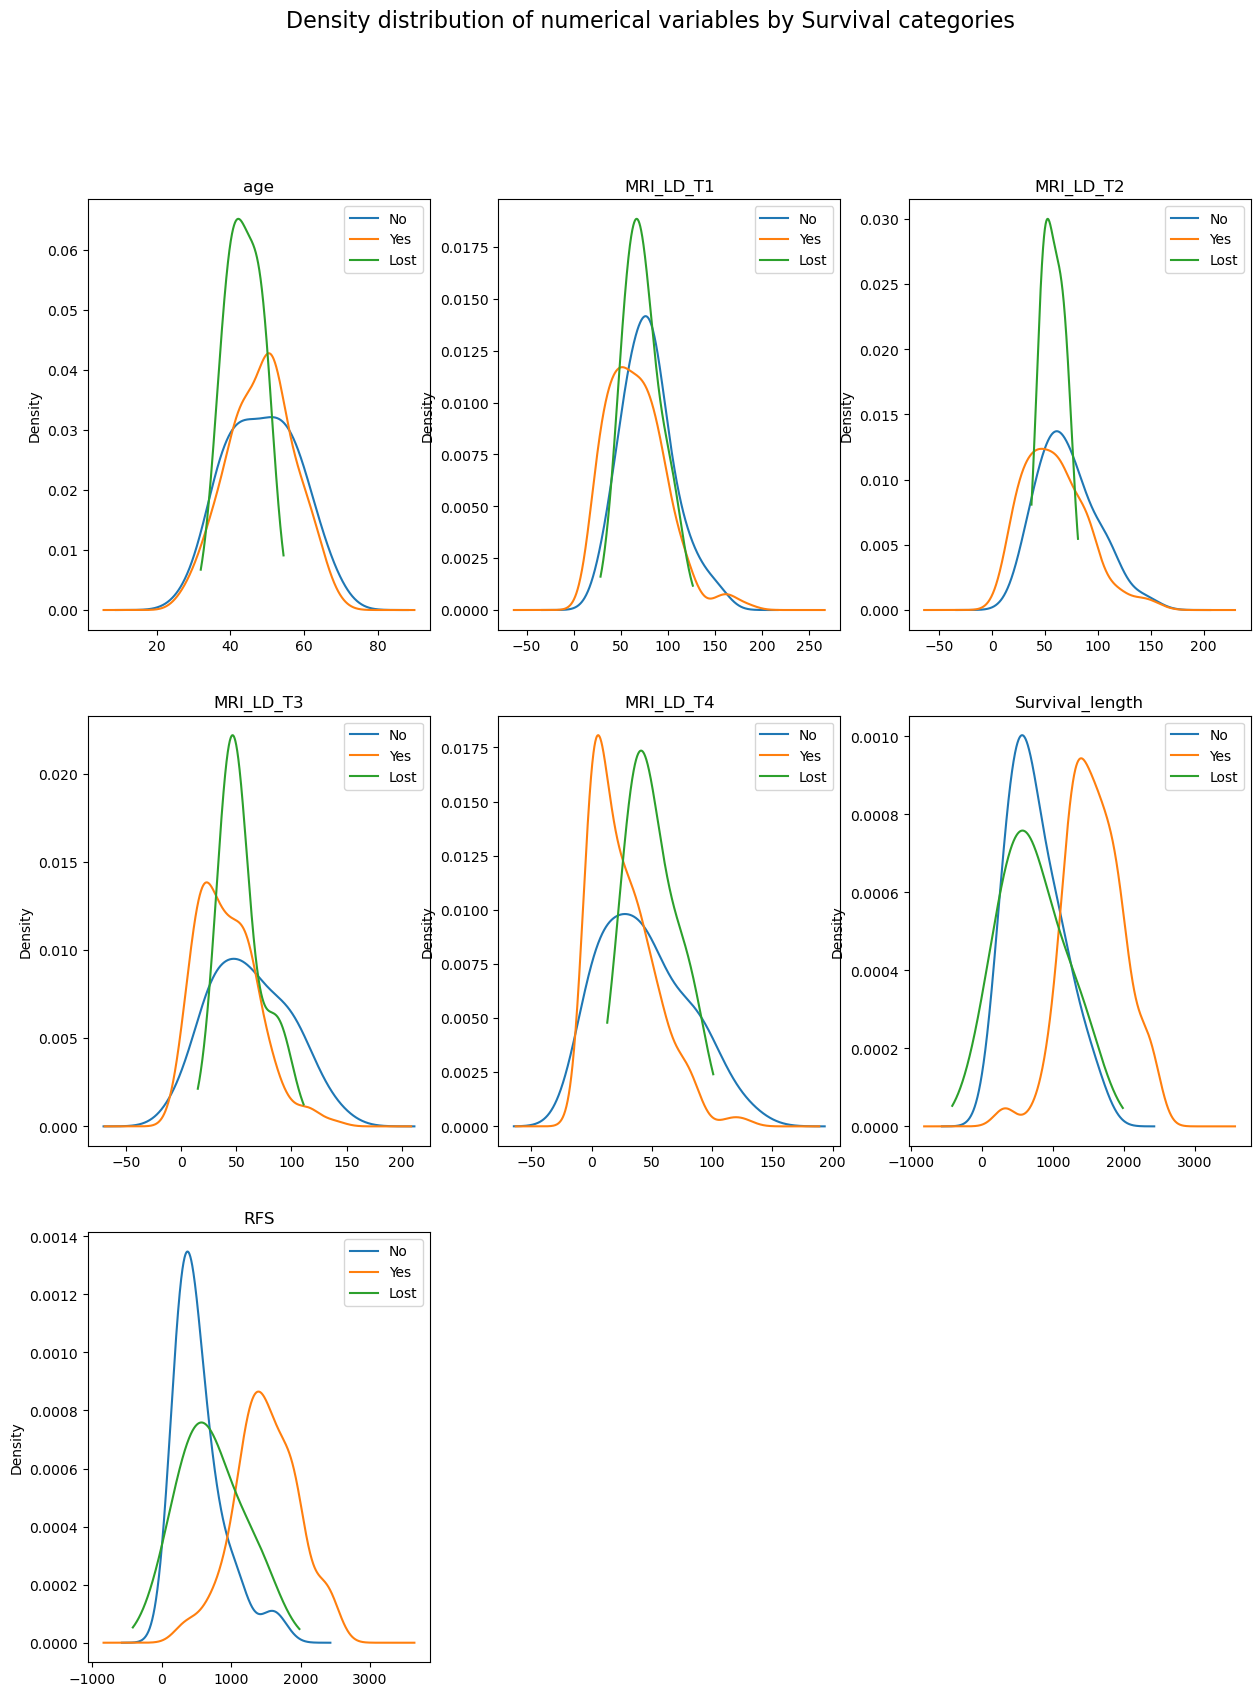

In [11]:
# By Survival
numeric_var_by_category(df_stat, numeric_feats, 'Survival')

Finally, the relationship between the numeric feature to predict, `RFS`, and the categorical variables is shown by several boxplots of the `RFS` values on each category.

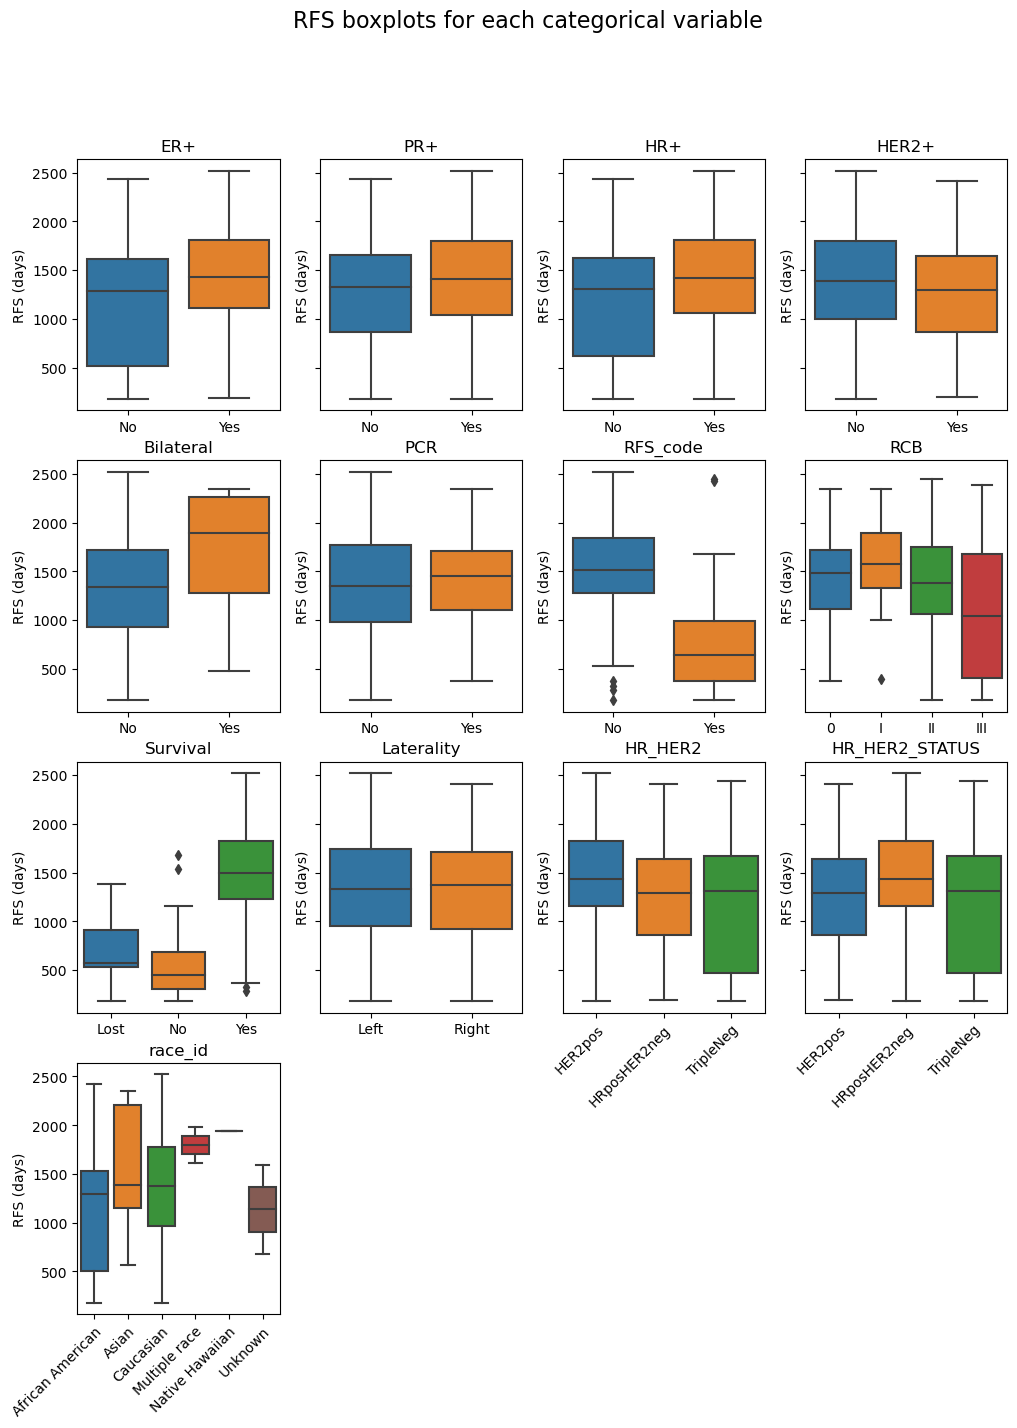

In [12]:
# RFS relation with categorical values
rfs_by_category(df_stat, categorical_feats)

<a id="preproc"></a>

## 3. Preprocessing

[Back to contents](#index)

To achieve better results for machine learning algorithms a preprocessing step is needed to delete all non-relevant variables that would introduce noise and redundant information.

Besides, all patients that contain missing values for any of the features should not be considered. Resulting dataframe is the cleaned and preprocessed dataset and is saved in file `ISPY_clean.csv` on the `data` folder.

In [13]:
# Drop columns
ISPY = ISPY.loc[:, ~ISPY.columns.isin(['Survival_length', 'RCB', 'RFS_code', 'HR+', 
                                       'HR_HER2', 'HR_HER2_STATUS'])]
ISPY.head()

,age,race_id,ER+,PR+,HER2+,Bilateral,Laterality,MRI_LD_T1,MRI_LD_T2,MRI_LD_T3,MRI_LD_T4,Survival,RFS,PCR
SUBJECTID,,,,,,,,,,,,,,
1001,38.73,1,1.0,0.0,0.0,0,1,88.0,78.0,30.0,14.0,8,751,0.0
1002,37.79,1,1.0,1.0,0.0,0,2,29.0,26.0,66.0,16.0,8,1043,0.0
1003,49.83,1,1.0,1.0,0.0,0,1,50.0,64.0,54.0,46.0,7,2387,0.0
1004,48.28,1,0.0,0.0,0.0,0,1,91.0,90.0,99.0,43.0,7,2436,0.0
1005,45.80,1,1.0,1.0,0.0,0,1,98.0,109.0,60.0,42.0,7,2520,0.0


In [14]:
# Remove missing values
print("Number of missing values per column: \n{}".format(ISPY.isnull().sum())) # None
ISPY = ISPY.loc[ISPY.Survival != 9,:] #Lost values
ISPY.dropna(inplace=True)
ISPY.Survival = ISPY.Survival.replace([7,8], [1, 0]) 

# Save clean dataset 
ISPY.to_csv('../data/ISPY_clean.csv', index=False)

Number of missing values per column: 
age            0
race_id        0
ER+            2
PR+            2
HER2+          5
Bilateral      0
Laterality     0
MRI_LD_T1      2
MRI_LD_T2     11
MRI_LD_T3     19
MRI_LD_T4     13
Survival       0
RFS            0
PCR            6
dtype: int64


For a better machine learning performance, a normalization of all variables is needed. Normalization is done by the `MinMaxScaler()`. 

In [15]:
# Normalize data
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
ISPY_norm = scaler.fit_transform(ISPY)
ISPY_norm_df = pd.DataFrame(ISPY_norm, columns=ISPY.columns)
ISPY_norm_df.head()

,age,race_id,ER+,PR+,HER2+,Bilateral,Laterality,MRI_LD_T1,MRI_LD_T2,MRI_LD_T3,MRI_LD_T4,Survival,RFS,PCR
0,0.285782,0.02,1.0,0.0,0.0,0.0,0.0,0.418182,0.469388,0.212766,0.111111,0.0,0.244340,0.0
1,0.263470,0.02,1.0,1.0,0.0,0.0,1.0,0.060606,0.115646,0.468085,0.126984,0.0,0.369073,0.0
2,0.549252,0.02,1.0,1.0,0.0,0.0,0.0,0.187879,0.374150,0.382979,0.365079,1.0,0.943187,0.0
3,0.512461,0.02,0.0,0.0,0.0,0.0,0.0,0.436364,0.551020,0.702128,0.341270,1.0,0.964118,0.0
4,0.453596,0.02,1.0,1.0,0.0,0.0,0.0,0.478788,0.680272,0.425532,0.333333,1.0,1.000000,0.0


<a id="ml"></a>

## 4. Machine learning models

[Back to contents](#index)

In [16]:
RANDOM_STATE = 14; # for reproducibility

<a id="pcr_ml"></a>

### 4.1. Prediction of PCR

[Back to contents](#index)

In [17]:
# Drop columns that represent other clinical outcomes
df_pcr = ISPY_norm_df.drop(['Survival', 'RFS'], axis=1).sort_values(by='PCR')

x= df_pcr.drop(['PCR'], axis=1)
y = df_pcr['PCR']

# Define outcome and predictors column names
outcome = 'PCR'
predictors = x.keys()

<a id="pcr_svm"></a>

#### 4.1.1 Support vector machine

[Back to contents](#index)

SUPPORT VECTOR MACHINE CLASSIFIER predicting PCR
Best parameters: 
{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
------------------------------------------------------------

              precision    recall  f1-score   support

          NO       0.75      1.00      0.85        44
         YES       0.00      0.00      0.00        15

    accuracy                           0.75        59
   macro avg       0.37      0.50      0.43        59
weighted avg       0.56      0.75      0.64        59

The estimated AUC is 0.5





C:\Users\irene\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\irene\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\irene\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


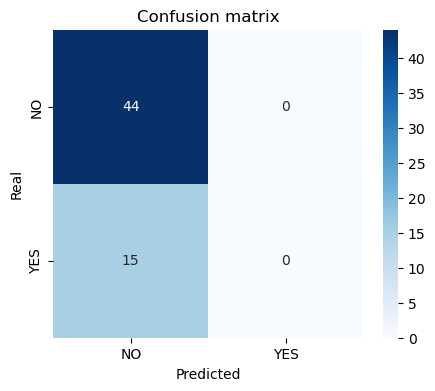

SUPPORT VECTOR MACHINE CLASSIFIER predicting PCR
Oversampling train data with ADASYN method and k=5 nearest neighbors

Best parameters: 
{'C': 5, 'gamma': 10, 'kernel': 'rbf'}
------------------------------------------------------------

              precision    recall  f1-score   support

          NO       0.82      0.91      0.86        44
         YES       0.60      0.40      0.48        15

    accuracy                           0.78        59
   macro avg       0.71      0.65      0.67        59
weighted avg       0.76      0.78      0.76        59

The estimated AUC is 0.655





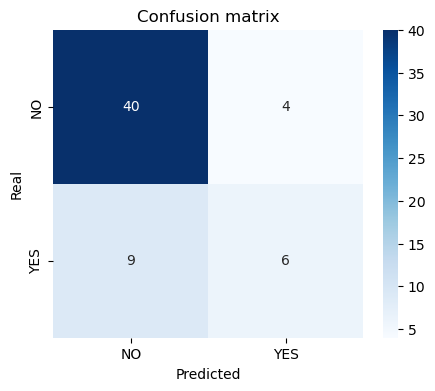

In [18]:
######################## SUPPORT VECTOR MACHINE ########################
# Define classifier
clf = svm.SVC(random_state=RANDOM_STATE, probability=True)
clf_name = 'SUPPORT VECTOR MACHINE CLASSIFIER'

# define parameter grid search
pars = dict(C = [0.1, 1, 5, 10],
            gamma = [1e-2, .1, 1, 10],
            kernel = ['linear', 'poly', 'rbf'])

# define scoring metric
score = 'accuracy'

# train and validate classifier
# No oversampling
auc1, fpr1, tpr1, svm_pcr_1 = train_test_classifier(x, y, clf, clf_name, pars, score, outcome)

# Oversampling
auc2, fpr2, tpr2, svm_pcr_2 = train_test_classifier(x, y, clf, clf_name, pars, score, outcome, oversampling=True)

# Save models
pickle.dump(svm_pcr_1, open('../models/svm_pcr_unbalanced.sav', 'wb'))
pickle.dump(svm_pcr_2, open('../models/svm_pcr_oversampled.sav', 'wb'))

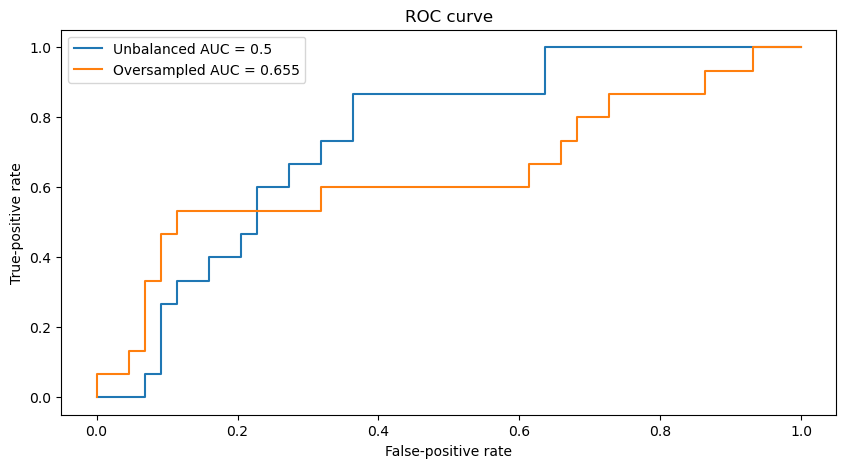

In [19]:
# plot roc comparing effect of oversampling
plot_roc(auc1, fpr1, tpr1, auc2, fpr2, tpr2)